<a href="https://colab.research.google.com/github/up99/golf-sintez/blob/main/Media_Pipe_Pose_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install and Import Dependencies

In [65]:
!pip install mediapipe opencv-python

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

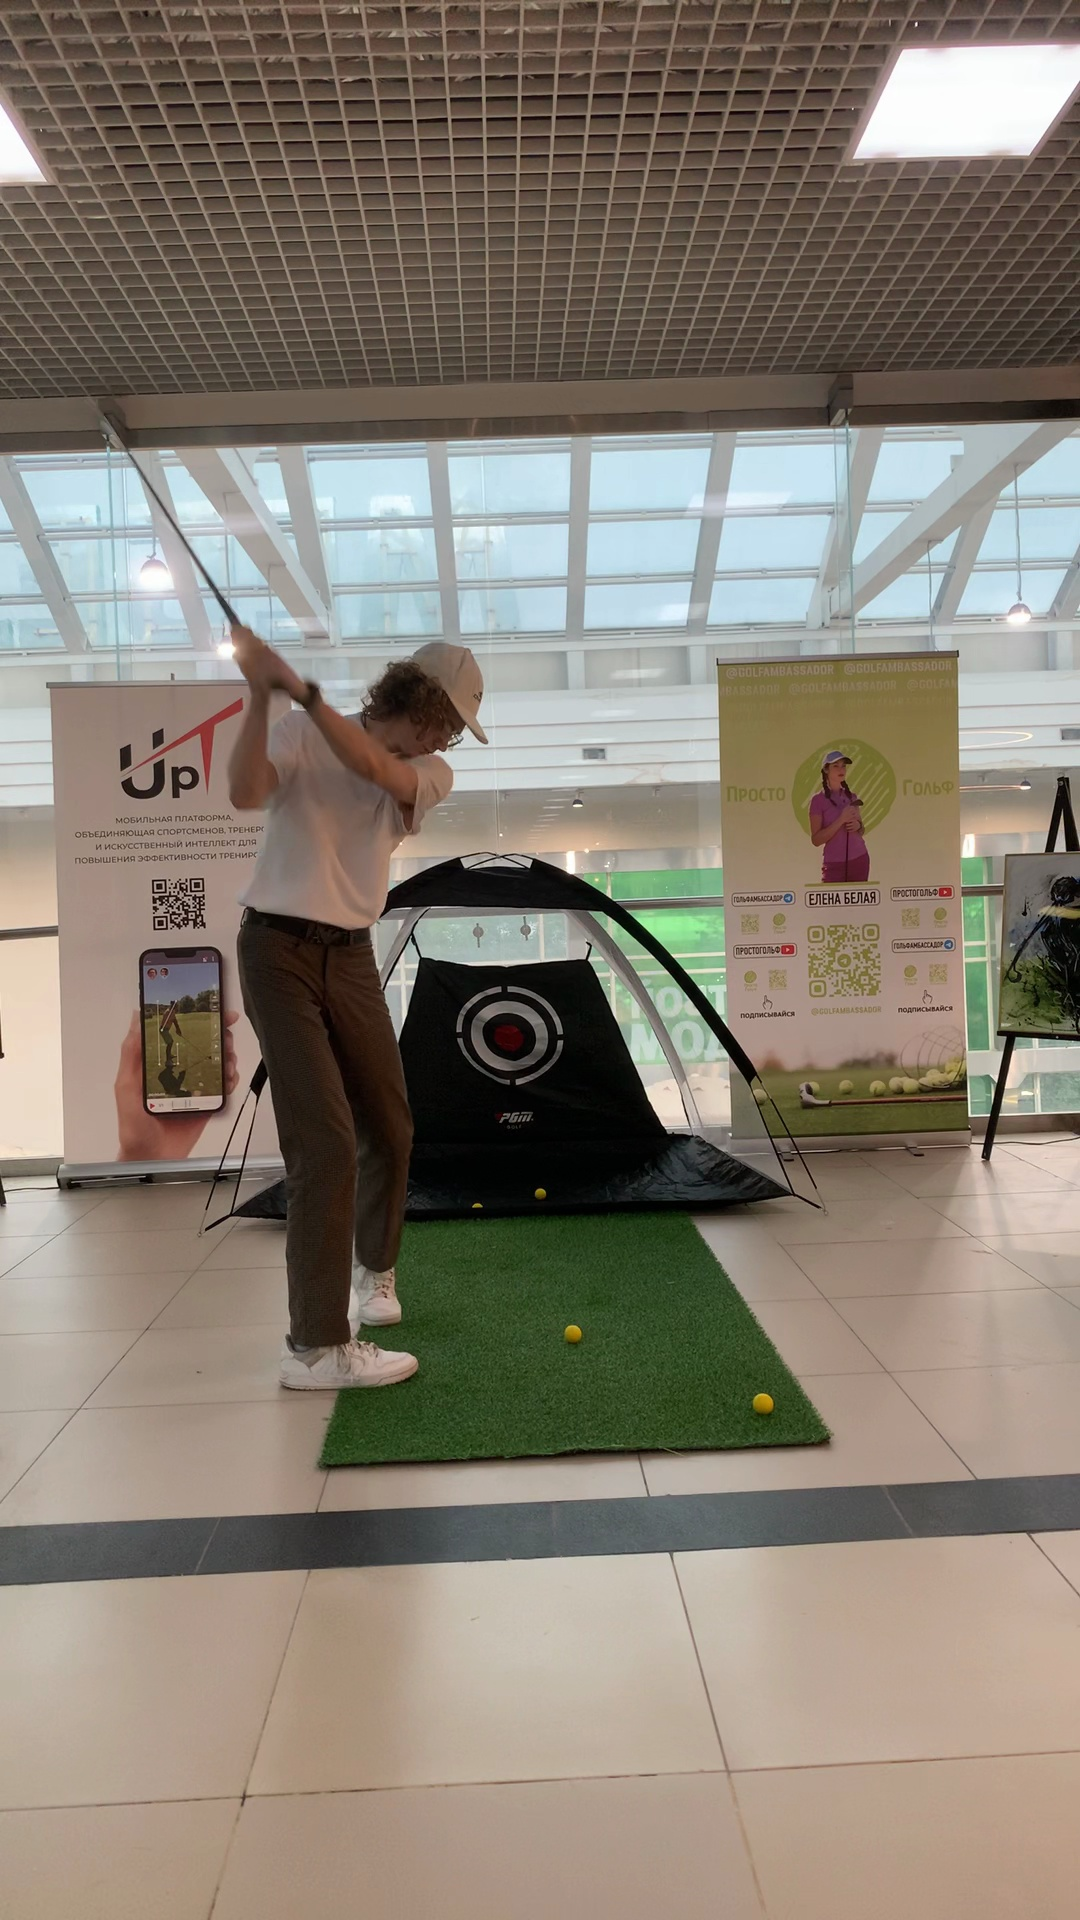

In [68]:
frame = cv2.imread("/content/drive/MyDrive/цифровой_прорыв/0ae17d29-242b-40ec-bff6-fe6b23ac8824_frame_19.jpg")
cv2_imshow(frame)
cv2.destroyAllWindows()

<img src="https://i.imgur.com/3j8BPdc.png" style="height:300px" >

In [69]:
def analyse_view(heel_l, heel_r, foot_ind_l, foot_ind_r):
  if (foot_ind_l.x>heel_l.x and foot_ind_r.x>heel_r.x):
    print("face on right")
  if (foot_ind_l.x<heel_l.x and foot_ind_r.x<heel_r.x):
    print("face on left")

# 3. Calculate Angles

In [70]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle >180.0:
        angle = 360-angle

    return angle

shoulders,
 elbows, wrists, hips, knees, ankles, heels, foot indexes, ears and mouth

address :
180deg - hip-knee-ankle  = (20,25) deg
180deg - knee-hip-shoullder = 45 deg

mistake

Lead side lateral bending

head movement : for P1 Address P4 Top  eye_outer, ear, mouth should be the same

In [71]:
def address_mistake(eps,shoulder, hip, knee, ankle):
  alpha = 180 - calculate_angle(hip, knee, ankle)
  beta = 180 - calculate_angle(knee, hip, shoulder)
  print(" alpha is ", alpha, "\n")
  if alpha< (20 - eps) or alpha>(25 + eps):
    print("addess is incorrect with knee, alpha is ", alpha, "\n")
  if beta <(45 - eps) or beta> (45 + eps):
    print("address incorrect spine angle, beta is ", beta, "\n")



In [95]:
def head_mov_mistake(ear_P1,  mouth_P1, ear_P4, mouth_P4, eps):
  if (ear_P1[0] < (ear_P4[0]- eps) or ear_P1[0] >(ear_P4[0] + eps) or mouth_P1[0] <(mouth_P4[0]- eps) or mouth_P1[0] > (mouth_P4[0] + eps) or ear_P1[1] < (ear_P4[1]- eps) or ear_P1[1] > (ear_P4[1] + eps) or mouth_P1[1] < (mouth_P4[1]- eps) or mouth_P1[1] > (mouth_P4[1] + eps)):
     print("head movement mistake\n")


left
left
right
right
right
 alpha is  34.84478946793192 

address incorrect spine angle, beta is  57.184449247869736 



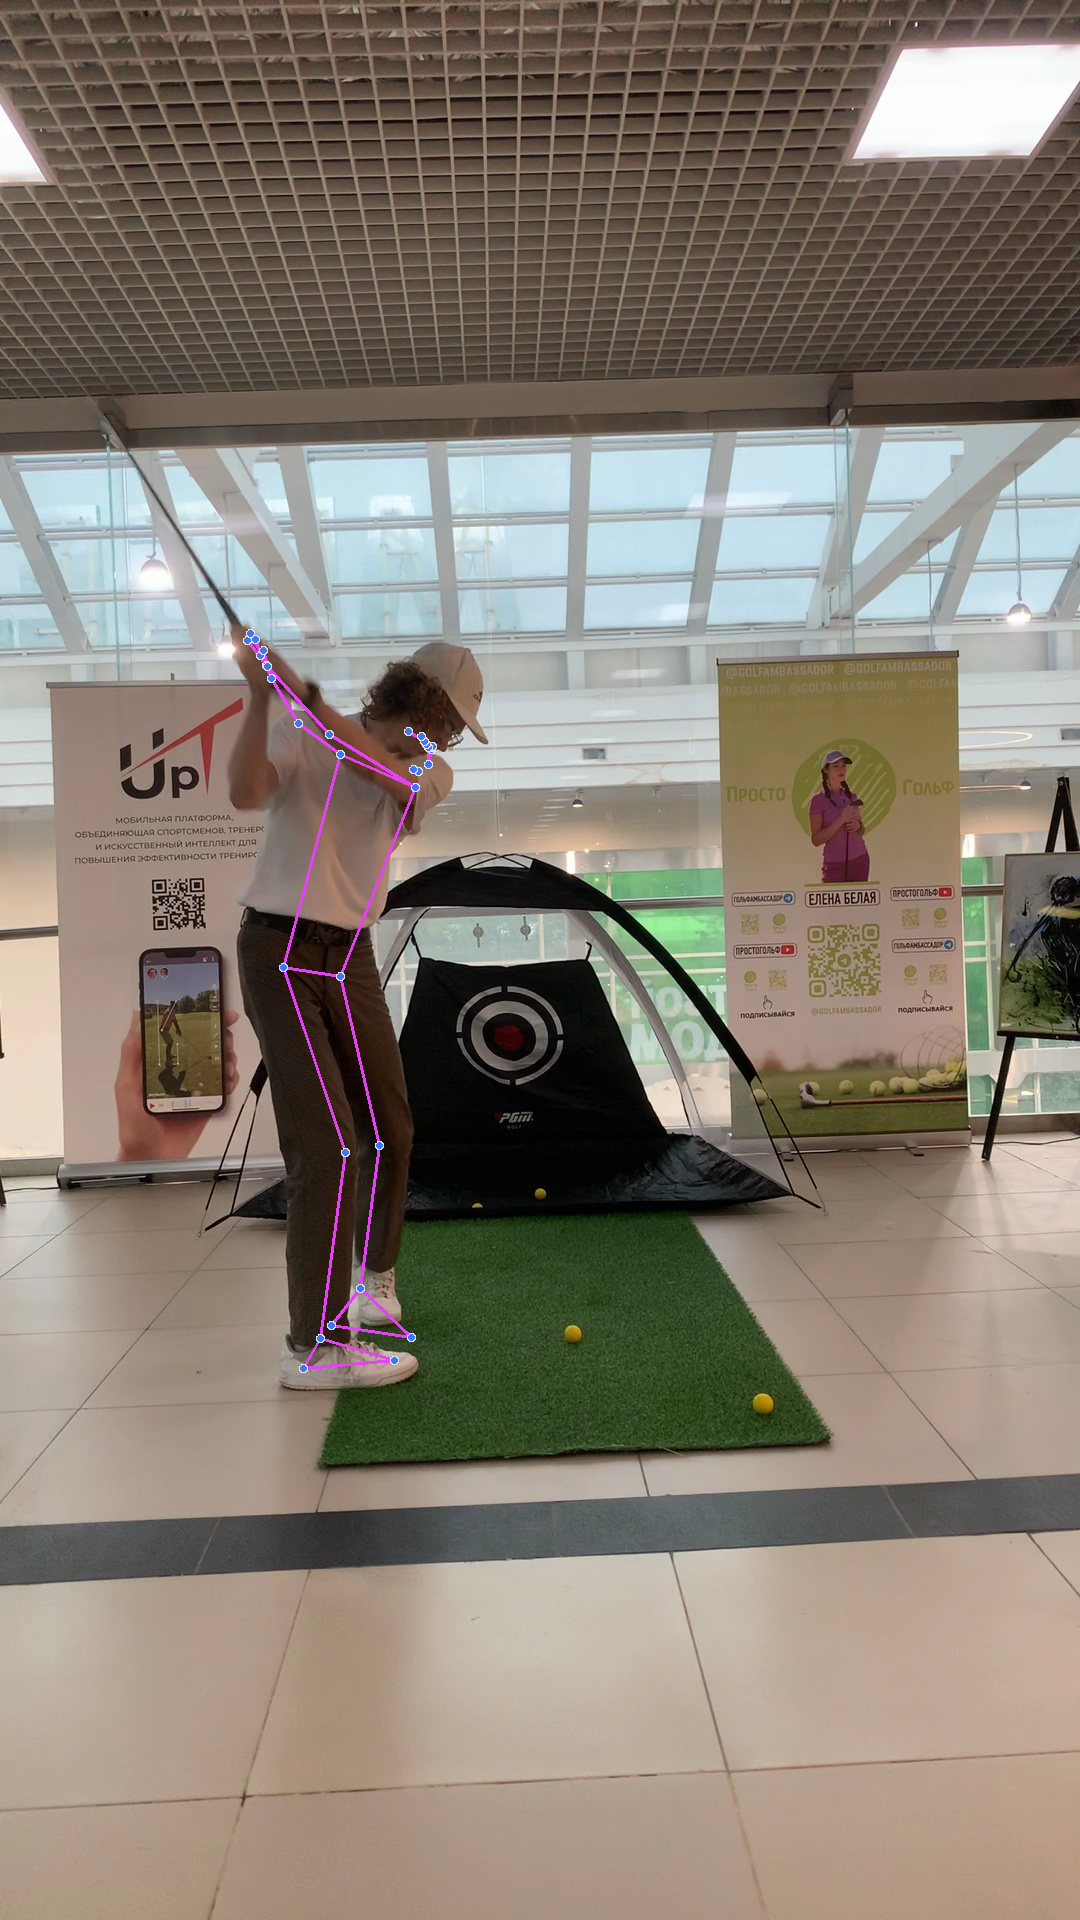

In [96]:

## Setup mediapipe instance
ear_P1,  mouth_P1, ear_P4, mouth_P4 = [0,0], [0,0], [0,0], [0,0]
stage = "address"
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:


      frame = cv2.imread("/content/drive/MyDrive/цифровой_прорыв/0ae17d29-242b-40ec-bff6-fe6b23ac8824_frame_19.jpg")

      # Recolor image to RGB
      image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image.flags.writeable = False

      # Make detection
      results = pose.process(image)

      # Recolor back to BGR
      image.flags.writeable = True
      image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

      # Extract landmarks
      # try:

      landmarks = results.pose_landmarks.landmark
      if stage =="address":
        # if (landmarks[mp_pose.PoseLandmark.LEFT_EAR.value] and landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value]):
        try:
          print("left")
          ear_P1 =  [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
          print("left")
          mouth_P1 = [landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].x,landmarks[mp_pose.PoseLandmark.LEFT_MOUTH_LEFT.value].y]
          print("left")
        # if (landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value] and landmarks[mp_pose.PoseLandmark.RIGHT_MOUTH.value]):
        except:
          print("right")
          ear_P1 =  [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
          print("right")
          mouth_P1 = [landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].y]
          print("right")
        eps = 10
        shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
        hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
        knee =  [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
        ankle =  [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
        address_mistake(eps ,shoulder, hip, knee, ankle)

      stage = "top"
      if stage =="top":
        # if (landmarks[mp_pose.PoseLandmark.LEFT_EAR.value] and landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value]):
        try:
          ear_P4 =  [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
          mouth_P4 = [landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_LEFT.value].y]
        # if (landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value] and landmarks[mp_pose.PoseLandmark.RIGHT_MOUTH.value]):
        except:
          ear_P4 =  [landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_EAR.value].y]
          mouth_P4 = [landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].x,landmarks[mp_pose.PoseLandmark.MOUTH_RIGHT.value].y]

      # print(ear_P1, ear_P4,  mouth_P1, mouth_P4)

      head_mov_mistake(ear_P1,  mouth_P1, ear_P4, mouth_P4, eps)




          # Get coordinates
          # shoulder_l = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
          # elbow_l = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
          # wrist_l = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
          # hip_l = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
          # knee_l =  [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
          # ankle_l =  [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]
          # heel_l =  [landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HEEL.value].y]
          # foot_ind_l =  [landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].x,landmarks[mp_pose.PoseLandmark.LEFT_FOOT_INDEX.value].y]
          # ear_l =  [landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].x,landmarks[mp_pose.PoseLandmark.LEFT_EAR.value].y]
          # mouth_l =  [landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value].x,landmarks[mp_pose.PoseLandmark.LEFT_MOUTH.value].y]





          # # Calculate angle
          # angle = calculate_angle(shoulder, elbow, wrist)

          # # Visualize angle
          # cv2.putText(image, str(angle),
          #                 tuple(np.multiply(elbow, [640, 480]).astype(int)),
          #                 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
          #                     )
          # print(angle)

      # except:
      #     pass


      # Render detections
      mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                              mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                )
      cv2_imshow(image)
      cv2.destroyAllWindows()


In [74]:
print(landmarks)

[x: 0.39687374234199524
y: 0.39837872982025146
z: -0.06991004198789597
visibility: 0.9951344132423401
, x: 0.39976292848587036
y: 0.39017266035079956
z: -0.054972004145383835
visibility: 0.9950488209724426
, x: 0.39983415603637695
y: 0.3894002139568329
z: -0.055155787616968155
visibility: 0.994750440120697
, x: 0.4002823829650879
y: 0.3887513279914856
z: -0.05517413467168808
visibility: 0.9943976402282715
, x: 0.39671313762664795
y: 0.3892514109611511
z: -0.08568856865167618
visibility: 0.9956691265106201
, x: 0.39455446600914
y: 0.3876463770866394
z: -0.08585415780544281
visibility: 0.9951096177101135
, x: 0.3925974667072296
y: 0.38612911105155945
z: -0.08597999811172485
visibility: 0.9947149157524109
, x: 0.39044517278671265
y: 0.3837752342224121
z: 0.05333886668086052
visibility: 0.9931675791740417
, x: 0.3785870373249054
y: 0.38101881742477417
z: -0.08888611942529678
visibility: 0.995311439037323
, x: 0.3873225450515747
y: 0.40208032727241516
z: -0.022920554503798485
visibility: 0.

In [75]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)
    print(lndmrk.value)

PoseLandmark.NOSE
0
PoseLandmark.LEFT_EYE_INNER
1
PoseLandmark.LEFT_EYE
2
PoseLandmark.LEFT_EYE_OUTER
3
PoseLandmark.RIGHT_EYE_INNER
4
PoseLandmark.RIGHT_EYE
5
PoseLandmark.RIGHT_EYE_OUTER
6
PoseLandmark.LEFT_EAR
7
PoseLandmark.RIGHT_EAR
8
PoseLandmark.MOUTH_LEFT
9
PoseLandmark.MOUTH_RIGHT
10
PoseLandmark.LEFT_SHOULDER
11
PoseLandmark.RIGHT_SHOULDER
12
PoseLandmark.LEFT_ELBOW
13
PoseLandmark.RIGHT_ELBOW
14
PoseLandmark.LEFT_WRIST
15
PoseLandmark.RIGHT_WRIST
16
PoseLandmark.LEFT_PINKY
17
PoseLandmark.RIGHT_PINKY
18
PoseLandmark.LEFT_INDEX
19
PoseLandmark.RIGHT_INDEX
20
PoseLandmark.LEFT_THUMB
21
PoseLandmark.RIGHT_THUMB
22
PoseLandmark.LEFT_HIP
23
PoseLandmark.RIGHT_HIP
24
PoseLandmark.LEFT_KNEE
25
PoseLandmark.RIGHT_KNEE
26
PoseLandmark.LEFT_ANKLE
27
PoseLandmark.RIGHT_ANKLE
28
PoseLandmark.LEFT_HEEL
29
PoseLandmark.RIGHT_HEEL
30
PoseLandmark.LEFT_FOOT_INDEX
31
PoseLandmark.RIGHT_FOOT_INDEX
32


In [16]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]

x: 0.24656304717063904
y: 0.3467384874820709
z: -0.03392228111624718
visibility: 0.8929044008255005